This project involved analysing a large dataset of anime shows. The dataset contained information about 18,495 anime shows, including details such as the name, type, release year, season, rating, voice actors, staff, and more.

The main objective of this project was to derive meaningful insights from the dataset by performing various data analysis tasks. These tasks included analysing the distribution of ratings, release trends, the prevalence of voice actors and staff, and comparing different types of anime.

This code will give you the average rating, the number of shows with ratings above and below the average, and the names of the highest and lowest rated shows

In [39]:
import pandas as pd
df = pd.read_csv('Anime.csv')

# Calculate the average rating
average_rating = df['Rating'].mean()
print(f'Average rating: {average_rating}')

# Count how many shows have a rating above and below the average
above_average = df[df['Rating'] > average_rating].shape[0]
below_average = df[df['Rating'] < average_rating].shape[0]
print(f'Number of shows with rating above average: {above_average}')
print(f'Number of shows with rating below average: {below_average}')

# Identify the highest and lowest rated shows
highest_rated = df[df['Rating'] == df['Rating'].max()]['Name']
lowest_rated = df[df['Rating'] == df['Rating'].min()]['Name']
print(f'Highest rated show(s): {highest_rated.values}')
print(f'Lowest rated show(s): {lowest_rated.values}')


Average rating: 3.3551327779224156
Number of shows with rating above average: 7722
Number of shows with rating below average: 7642
Highest rated show(s): ['Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc'
 'Fruits Basket the Final Season']
Lowest rated show(s): ['Tenkuu Danzai Skelter Heaven']


This code will give you a histogram, a box plot, and a violin plot of the anime ratings in your dataset

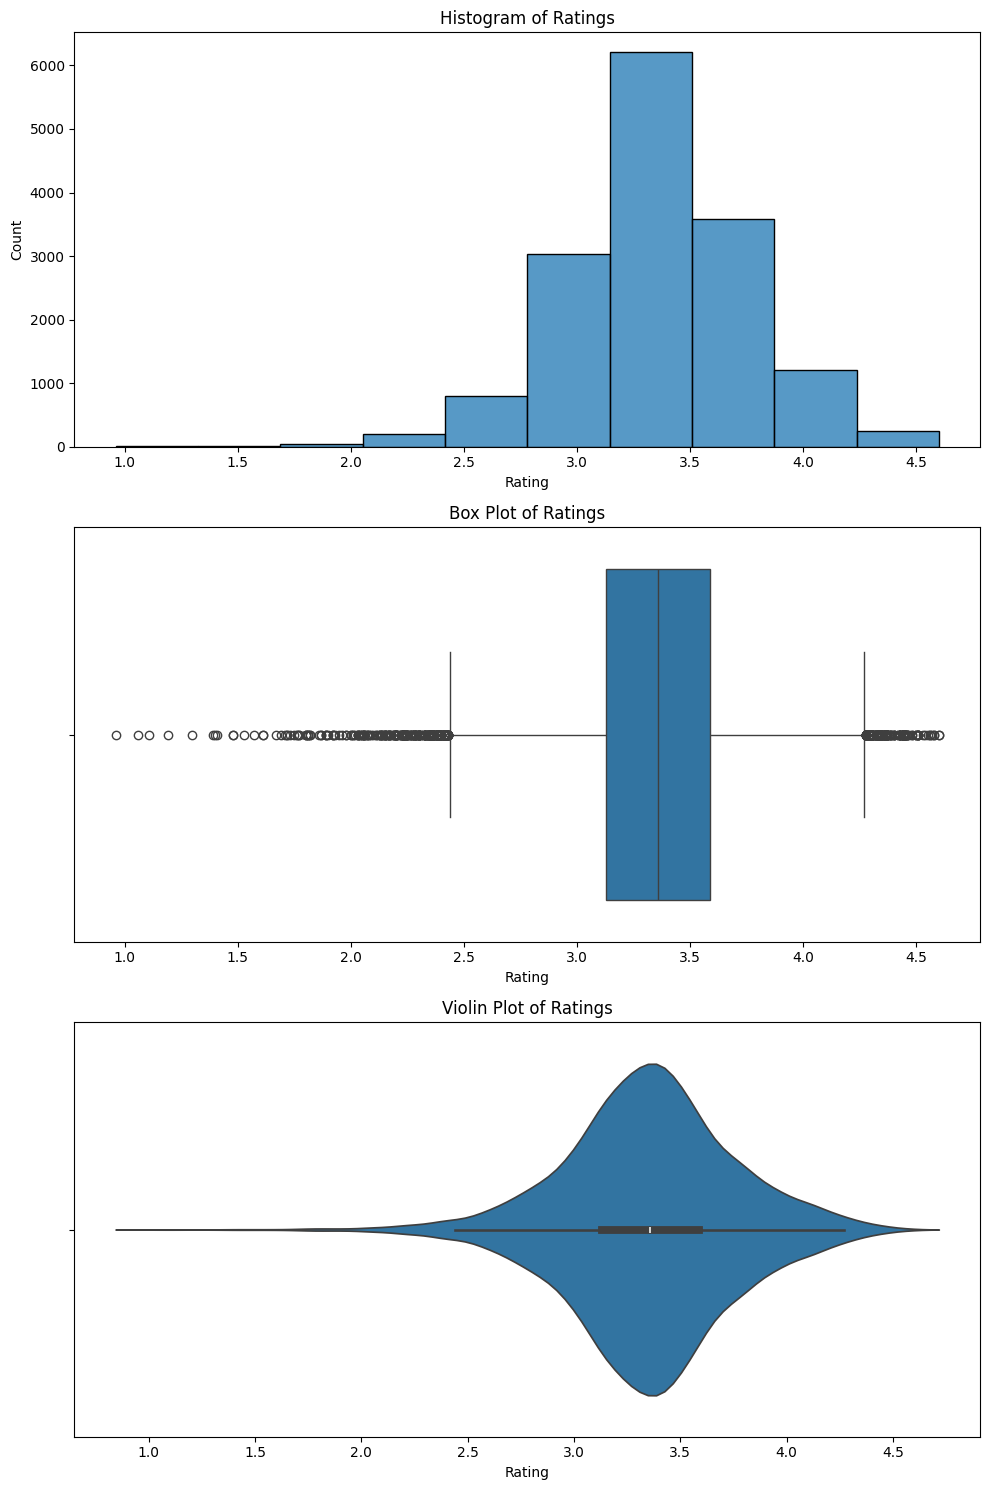

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Plot a histogram
sns.histplot(df['Rating'], bins=10, ax=axes[0])
axes[0].set_title('Histogram of Ratings')

# Plot a box plot
sns.boxplot(x=df['Rating'], ax=axes[1])
axes[1].set_title('Box Plot of Ratings')

# Plot a violin plot
sns.violinplot(x=df['Rating'], ax=axes[2])
axes[2].set_title('Violin Plot of Ratings')

# Display the plots
plt.tight_layout()
plt.show()


This code will give you three plots: the number of anime released each year, the average rating of anime released each year, and the number of anime released each season.

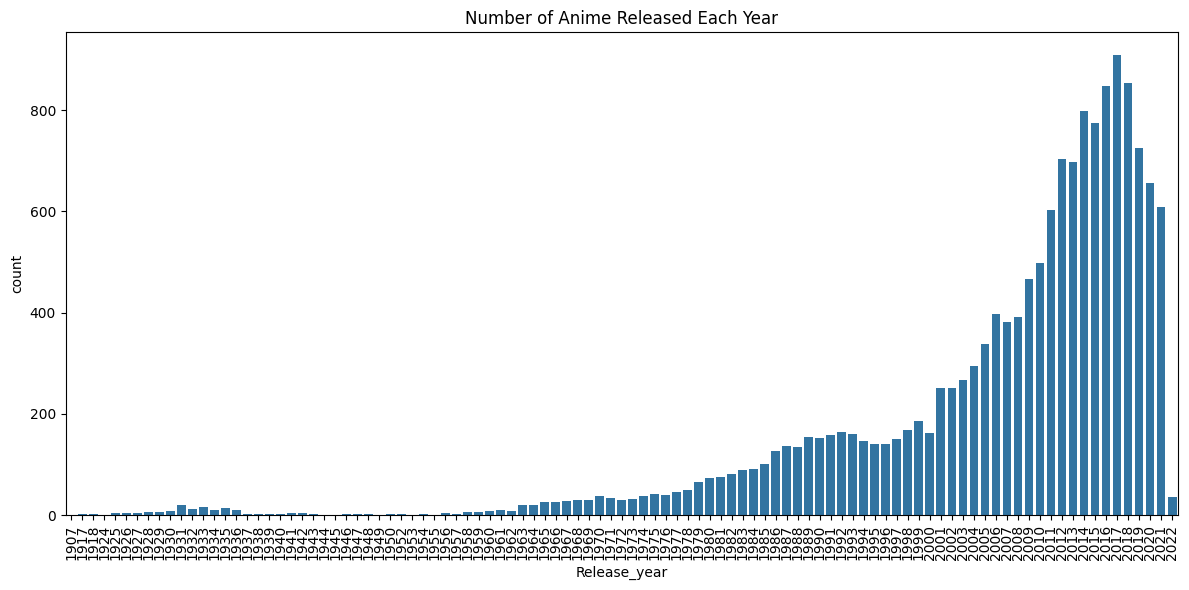

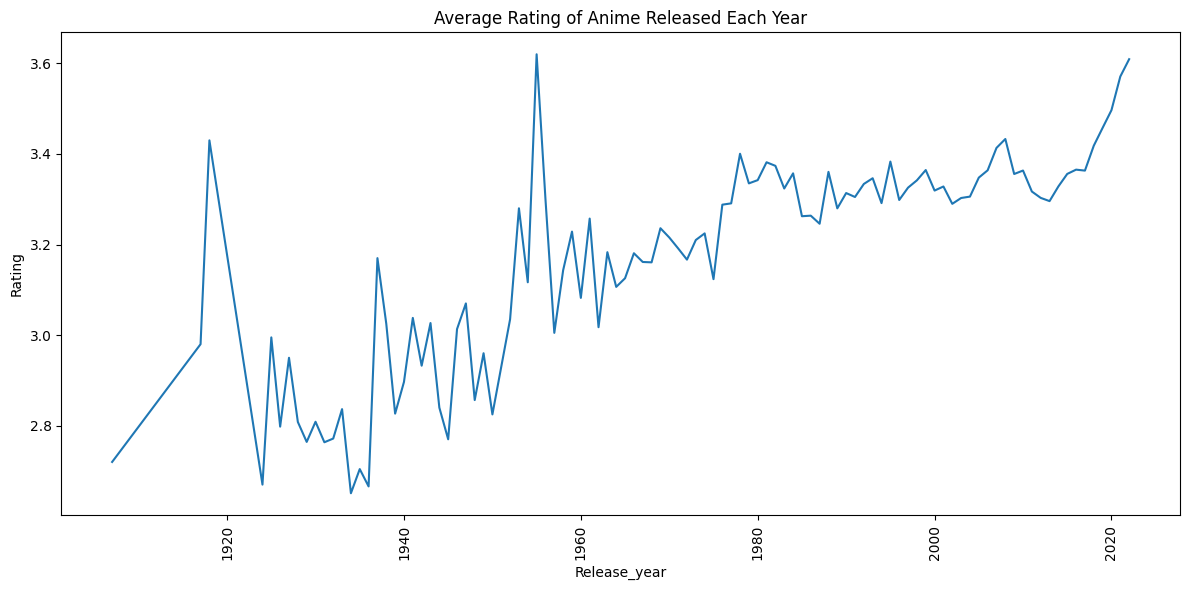

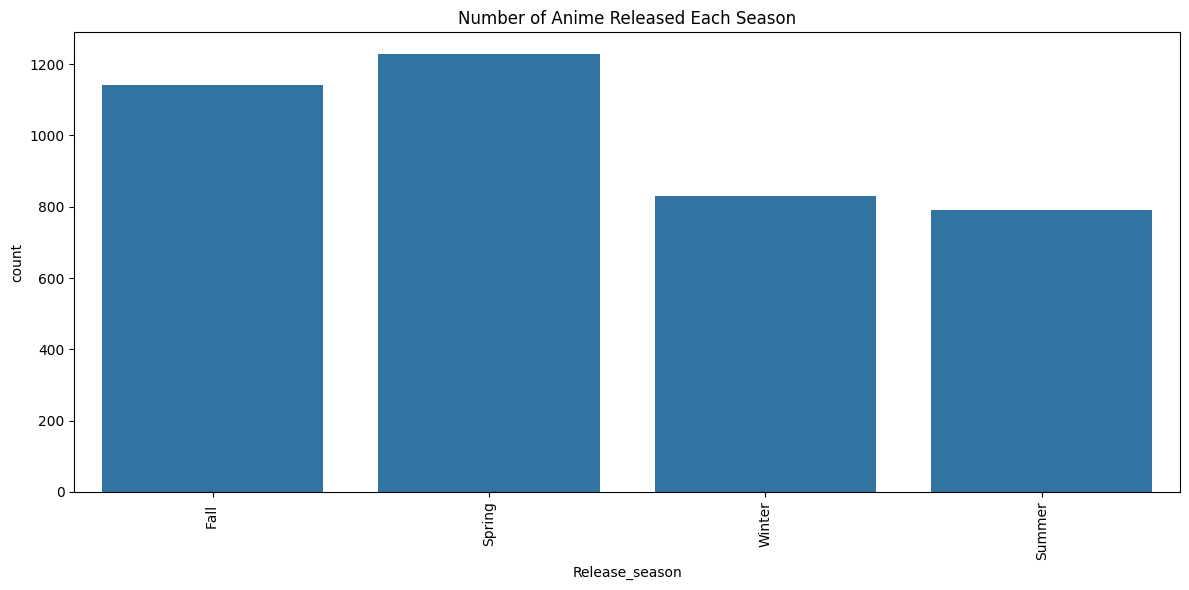

In [44]:
# Convert the 'Release_year' column to numeric values (errors='coerce' will turn non-numeric values into NaN)
df['Release_year'] = pd.to_numeric(df['Release_year'], errors='coerce')

# Drop rows with NaN 'Release_year' or 'Rating'
df = df.dropna(subset=['Release_year', 'Rating'])

# Convert 'Release_year' back to integer
df['Release_year'] = df['Release_year'].astype(int)

# Plot the number of anime released each year
plt.figure(figsize=(12, 6))
sns.countplot(x='Release_year', data=df)
plt.title('Number of Anime Released Each Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the average rating of anime each year
average_ratings = df.groupby('Release_year')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_year', y='Rating', data=average_ratings)
plt.title('Average Rating of Anime Released Each Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the number of anime released each season
plt.figure(figsize=(12, 6))
sns.countplot(x='Release_season', data=df)
plt.title('Number of Anime Released Each Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This code will give you a bar plot of the 10 most common genres and print the average rating for each genre. 

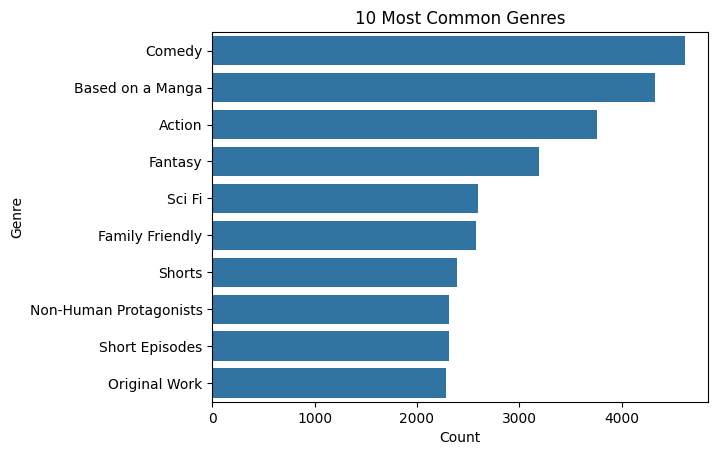

In [52]:
from collections import Counter

# Encountered a TypeError and these 2 lines of code will replace any NaN values in the ‘Tags’ column with an empty string, which should prevent the TypeError from occurring. 
df['Tags'] = df['Tags'].fillna('')
all_genres = df['Tags'].str.split(', ').sum()


# Split the 'Tags' into separate genres and create a new dataframe
all_genres = df['Tags'].str.split(', ').sum()
genres_df = pd.DataFrame(Counter(all_genres), index=['count']).transpose().reset_index()

# Plot the 10 most common genres
top_genres = genres_df.nlargest(10, 'count')
sns.barplot(x='count', y='index', data=top_genres)
plt.title('10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Calculate the average rating for each genre
genre_ratings = df['Tags'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_ratings['Rating'] = df['Rating']
average_genre_ratings = genre_ratings.groupby('genre')['Rating'].mean().sort_values(ascending=False)

# Please not here that I have purposely not printed the average rating for each genre since the results were a little explicit and I would like to keep my project family-friendly.
# So incase you wish to know the insights simply write the following lines of here after the end of this comment: print(average_genre_ratings) is the line of code to be executed

This code will give you a bar plot of the 10 most common content warnings in your dataset.

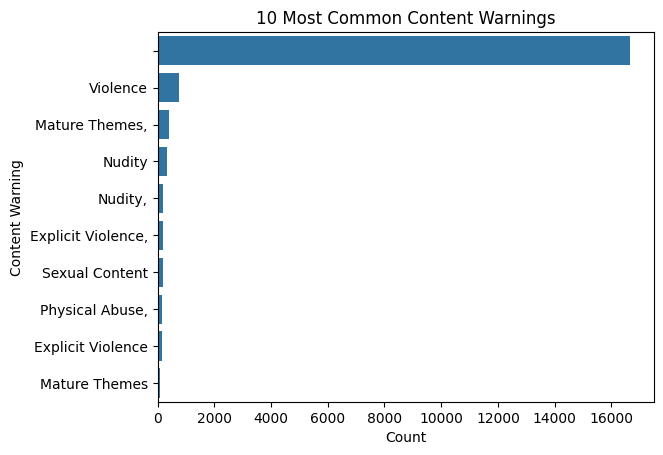

In [54]:
# Replace NaN values with an empty string
df['Content_Warning'] = df['Content_Warning'].fillna('')

# Split the 'Content_Warning' into separate warnings
all_warnings = df['Content_Warning'].str.split(', ').sum()

# Create a new dataframe with the count of each warning
warnings_df = pd.DataFrame(Counter(all_warnings), index=['count']).transpose().reset_index()

# Plot the 10 most common content warnings
top_warnings = warnings_df.nlargest(10, 'count')
sns.barplot(x='count', y='index', data=top_warnings)
plt.title('10 Most Common Content Warnings')
plt.xlabel('Count')
plt.ylabel('Content Warning')
plt.show()


This code will give you a bar plot of the 10 studios that produce the most anime and print the average rating for each studio. 

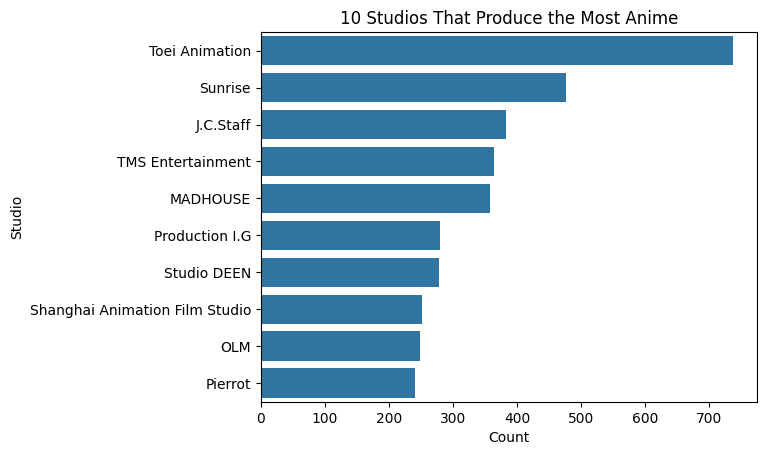

Studio
Studio Pivote       4.360000
Tiger Animation     4.350000
B.C MAY PICTURES    4.190000
Mua Film            4.160000
Motion Magic        4.142222
                      ...   
Winter 2008              NaN
Winter 2022              NaN
Yi Animation             NaN
foodunited.              NaN
studio bh                NaN
Name: Rating, Length: 745, dtype: float64


In [55]:
# Count the number of anime produced by each studio
studio_counts = df['Studio'].value_counts().reset_index()
studio_counts.columns = ['Studio', 'Count']

# Plot the 10 studios that produce the most anime
top_studios = studio_counts.nlargest(10, 'Count')
sns.barplot(x='Count', y='Studio', data=top_studios)
plt.title('10 Studios That Produce the Most Anime')
plt.xlabel('Count')
plt.ylabel('Studio')
plt.show()

# Calculate the average rating for each studio
studio_ratings = df.groupby('Studio')['Rating'].mean().sort_values(ascending=False)

# Print the average ratings
print(studio_ratings)


This code will create two bar plots: one for the count of the top 10 most prevalent individuals, and one for their average ratings

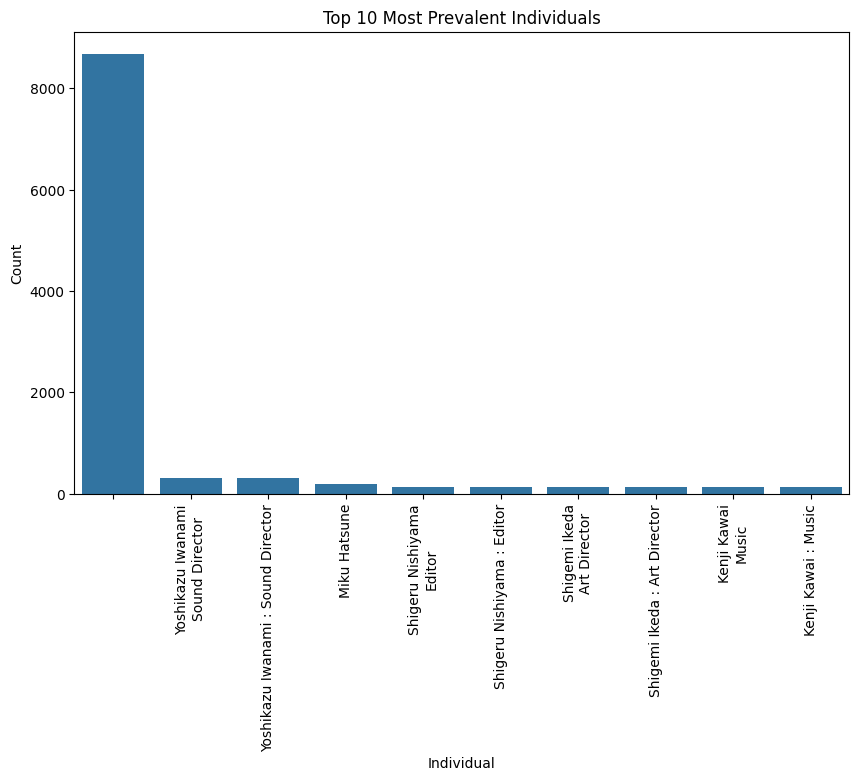

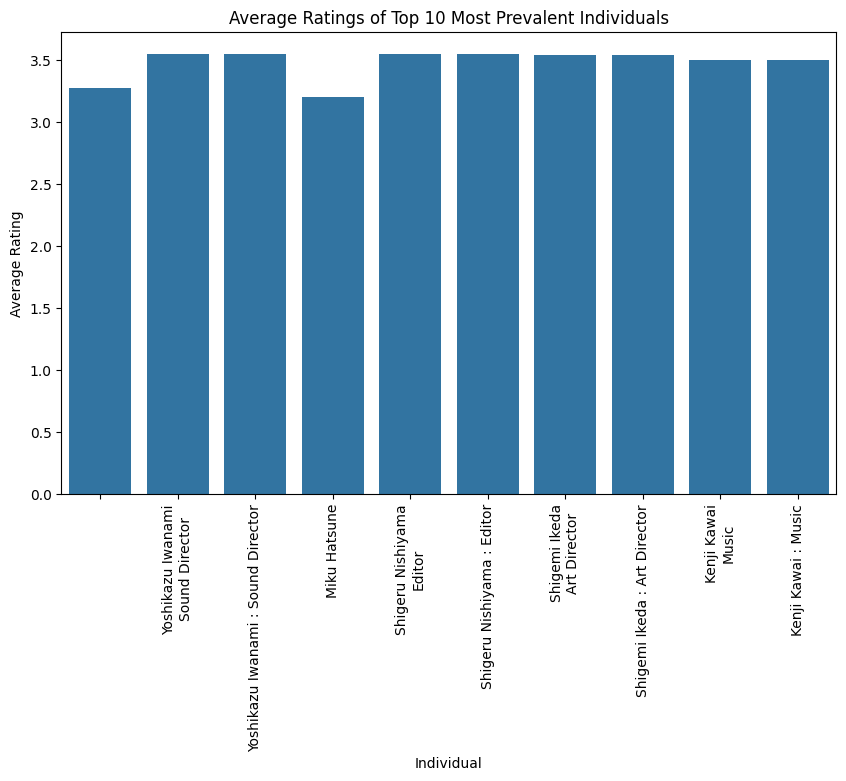

In [59]:
# Get the top 10 most prevalent individuals
top_10_individuals = individuals_df.nlargest(10, 'count')

# Plot the count of the top 10 most prevalent individuals
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='count', data=top_10_individuals)
plt.xlabel('Individual')
plt.ylabel('Count')
plt.title('Top 10 Most Prevalent Individuals')
plt.xticks(rotation=90)
plt.show()

# Get the average ratings of the top 10 most prevalent individuals
top_individual_ratings = average_individual_ratings[top_10_individuals['index']]

# Plot the average ratings of the top 10 most prevalent individuals
plt.figure(figsize=(10, 6))
sns.barplot(x=top_individual_ratings.index, y=top_individual_ratings.values)
plt.xlabel('Individual')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top 10 Most Prevalent Individuals')
plt.xticks(rotation=90)
plt.show()


This code will give you two plots: the quantity of each type of anime and the average rating of each type of anime. 

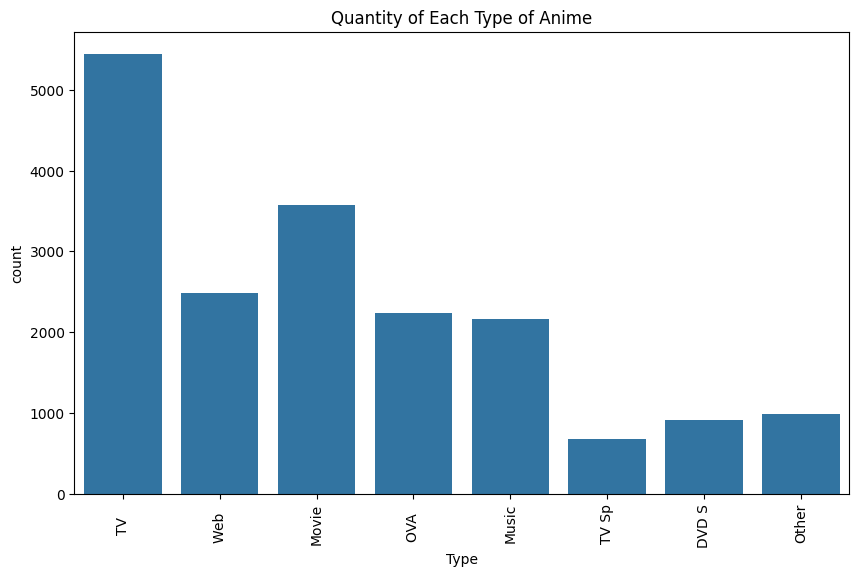

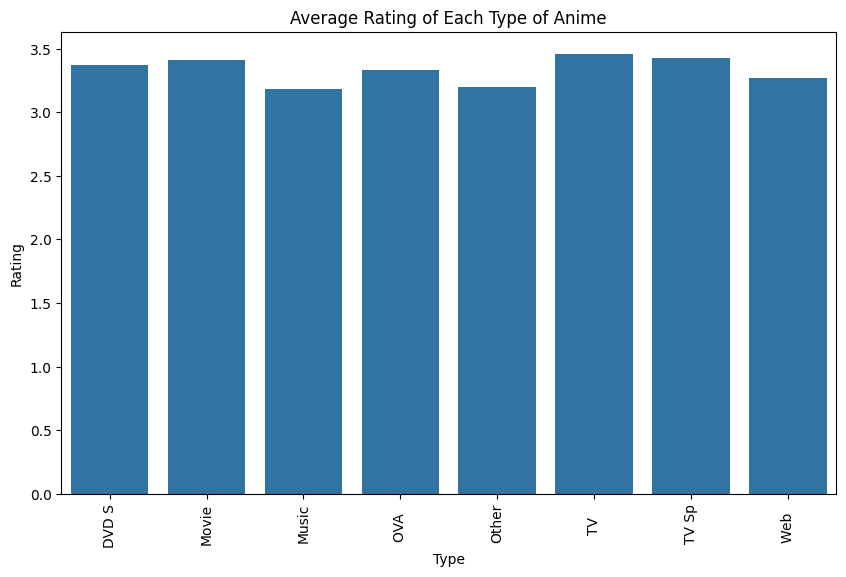

In [60]:
# Load the data
df = pd.read_csv('anime.csv')

# Plot the quantity of each type of anime
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title('Quantity of Each Type of Anime')
plt.xticks(rotation=90)
plt.show()

# Plot the average rating of each type of anime
average_ratings = df.groupby('Type')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Rating', data=average_ratings)
plt.title('Average Rating of Each Type of Anime')
plt.xticks(rotation=90)
plt.show()


Conclusion:
This project provided valuable insights into the world of anime and can serve as a foundation for further analysis or a recommendation system. The insights derived from this project could be useful for anime creators, distributors, and fans alike. The project demonstrated the power of Python and its libraries in handling, analysing, and visualizing large datasets.